In [79]:
import os
import re
import sys
import numpy as np
from Bio import SeqIO
# from Bio.Seq import Seq
# from Bio.SeqRecord import SeqRecord
#pairwise also 
# from Bio import pairwise2
from multiprocessing import Pool
import time
import hashlib
import farmhash
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from tqdm import tqdm

In [80]:
# def generate_minhash_signature(k, n, num_hashes):
#     """Generate MinHash signature for the files"""
#     signature = []
#     for i in range(k):
#         with open(f'file{i}.txt', 'r') as file:
#             lines = file.readlines()
#             data = [int(line.strip()) for line in lines]

#         minhash = [float('inf')] * num_hashes  # Initialize with infinity

#         # Generate hash values using different hash functions
#         for num in data:
#             for j in range(num_hashes):
#                 hash_val = int(hashlib.sha256(str(num).encode() + str(j).encode()).hexdigest(), 16)
#                 minhash[j] = min(minhash[j], hash_val)

#         signature.append(minhash)

#     return signature


#i want to do this for fasta files sequences 
data = {}

In [81]:
def get_fasta_files(directory):
    files = os.listdir(directory)
    fasta_files = []
    for file in files:
        if re.search(r"\.fasta$", file):
            fasta_files.append(file)
    return fasta_files

In [82]:
fasta_files = get_fasta_files("chi")

In [83]:
for file in fasta_files:
    with open("chi/" + file, "r") as f:
        data[file] = {}

In [84]:
for file in fasta_files:
    for record in SeqIO.parse("chi/" + file, "fasta"):
        data[file][record.id] = str(record.seq)

In [85]:
sequences = []
labels = []
for file in data:
    for header in data[file]:
        sequences.append(data[file][header])
        labels.append(header)

In [86]:
#Now I want to encode the sequences using integers 
#Find the unique characters in the sequences
unique_chars = set()
for seq in sequences:
    for char in seq:
        unique_chars.add(char)

print(unique_chars)

{'C', 'T', 'A', 'G'}


In [87]:
dict_encode = {}
dict_encode["A"] = 0
dict_encode["C"] = 1
dict_encode["G"] = 2
dict_encode["T"] = 3

In [88]:
#Now I want to encode the sequences
encoded_sequences = []
for seq in sequences:
    encoded_seq = ""
    for char in seq:
        encoded_seq += str(dict_encode[char])
    encoded_sequences.append(encoded_seq)

In [131]:
#Now in the "text_files_draft" I want to create text files with the encoded sequences
#filei should contain the encoded sequence of sequences[i] in a single line

for i in tqdm(range(len(encoded_sequences))):
    with open("text_files_draft/file" + str(i) + ".txt", "w") as f:
        # for char in encoded_sequences[i]:
        #     f.write(char + "\n")
        # Put each k-mer in a new line
        k = 15 # k-mer length
        for j in range(0, len(encoded_sequences[i]) - k + 1, 1):
            f.write(encoded_sequences[i][j:j+k] + "\n")

100%|██████████| 600/600 [00:01<00:00, 520.18it/s]


In [132]:
def generate_minhash_signature(k, n, num_hashes):
    """Generate MinHash signature for the files"""
    signature = []
    for i in range(k):
        with open(f'text_files_draft/file{i}.txt', 'r') as file:
            lines = file.readlines()
            data = [int(line.strip()) for line in lines]

        minhash = [float('inf')] * num_hashes  # Initialize with infinity

        # Generate hash values using different hash functions
        for num in data:
            for j in range(num_hashes):
                hash_val = int(farmhash.hash32(str(num) + str(j)))
                # hash_val = int(hashlib.sha256(str(num).encode() + str(j).encode()).hexdigest(), 16)
                minhash[j] = min(minhash[j], hash_val)

        signature.append(minhash)

    return signature

In [133]:
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    similarity = intersection / union
    
    return similarity

In [134]:
num_hashes = 32
minhash_signature = generate_minhash_signature(600, 400, num_hashes)
print(len(minhash_signature))

600


In [135]:
sys.set_int_max_str_digits(1000000)

In [136]:
results_adj = [[0 for i in range(600)] for j in range(600)]


In [137]:
start = time.time()

for i in range(600):
    data_1 = minhash_signature[i]
    for j in range(i,600):
        data_2 = minhash_signature[j]
        sim = jaccard_similarity(data_1,data_2)
        results_adj[i][j] = sim
        results_adj[j][i] = sim
        
end = time.time()
print("{} minutes".format(round((end - start)/60,2)))

0.01 minutes


In [138]:
results_adj

[[1.0,
  0.016666666666666666,
  0.05084745762711865,
  0.0,
  0.5641025641025641,
  0.01639344262295082,
  0.03389830508474576,
  0.2653061224489796,
  0.0,
  0.0,
  0.0,
  0.03389830508474576,
  0.1509433962264151,
  0.35555555555555557,
  0.03389830508474576,
  0.0,
  0.0,
  0.0,
  0.0,
  0.16981132075471697,
  0.05172413793103448,
  0.0,
  0.017241379310344827,
  0.03389830508474576,
  0.05084745762711865,
  0.7142857142857143,
  0.19607843137254902,
  0.1509433962264151,
  0.0,
  0.0,
  0.38636363636363635,
  0.01694915254237288,
  0.05084745762711865,
  0.05084745762711865,
  0.03333333333333333,
  0.03333333333333333,
  0.01639344262295082,
  0.016666666666666666,
  0.0,
  0.05263157894736842,
  0.03333333333333333,
  0.0,
  0.0,
  0.03571428571428571,
  0.0,
  0.0,
  0.05172413793103448,
  0.016666666666666666,
  0.03333333333333333,
  0.0,
  0.0,
  0.0,
  0.14814814814814814,
  0.0,
  0.034482758620689655,
  0.016666666666666666,
  0.0,
  0.01639344262295082,
  0.0,
  0.033898

In [139]:
adj_new = 1-np.array(results_adj)

/var/folders/d8/y91xl5214d7cwtfjh2g_r6kc0000gn/T/ipykernel_30208/3462319118.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(adj_new, method = 'average', metric = 'jaccard')


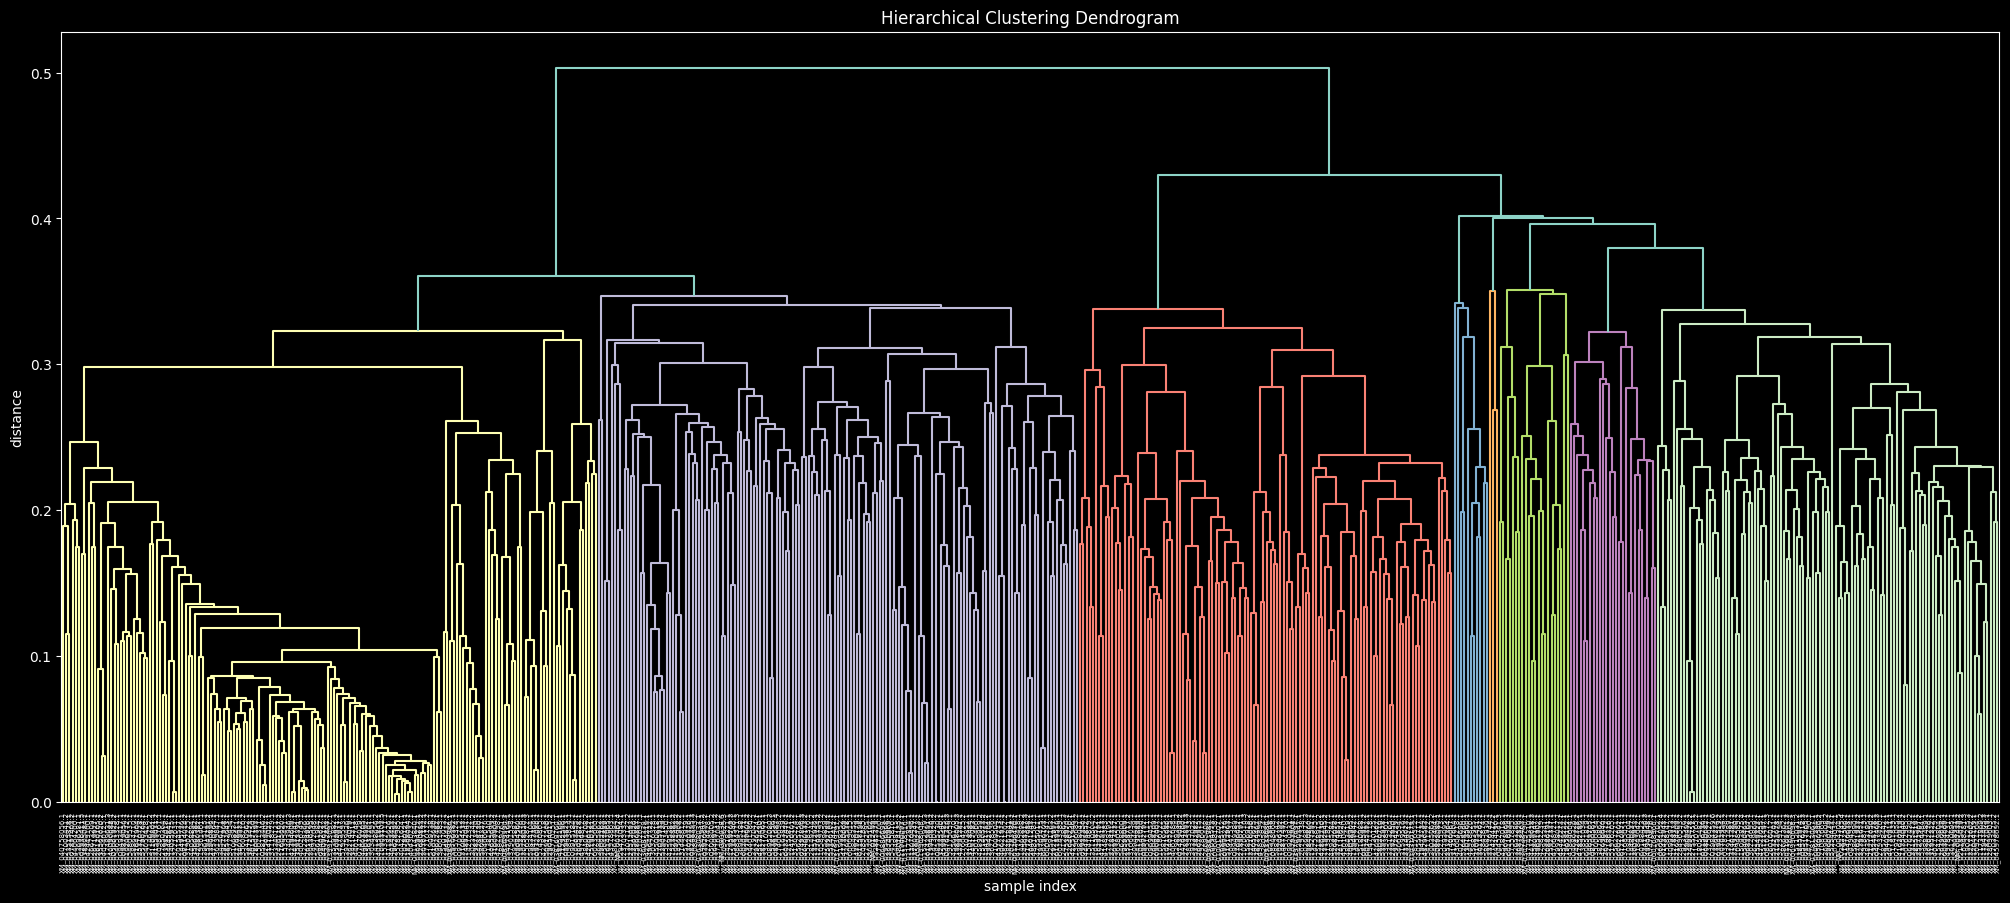

In [140]:
# Z = linkage(adj_new, 'ward')
# plt.figure(figsize=(25, 10))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(Z, labels=labels, leaf_rotation=90)
# plt.show()

# #download the dendrogram
# plt.savefig("dendrogram.png")

labels_new = labels

#adjust the horizontal scale 
Z = linkage(adj_new, method = 'average', metric = 'jaccard')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram ')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, labels=labels_new, leaf_rotation=90)
plt.show()

In [141]:
num_clusters = 2
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, num_clusters, criterion='maxclust')
from collections import Counter
Counter(clusters)

Counter({1: 315, 2: 285})

In [142]:
Counter(clusters[:300])

Counter({2: 285, 1: 15})

In [143]:
Counter(clusters[300:])

Counter({1: 300})